In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
dta =sm.datasets.fair.load_pandas().data

In [2]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
dta['affair'] =np.where(dta['affairs']>0,1,0)
dta['affair'].astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int32

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


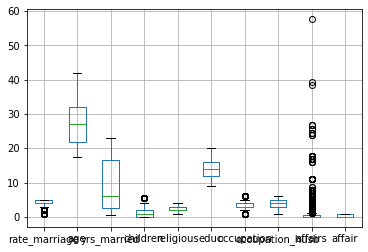

In [6]:
dta.boxplot()

In [7]:
import seaborn as sns

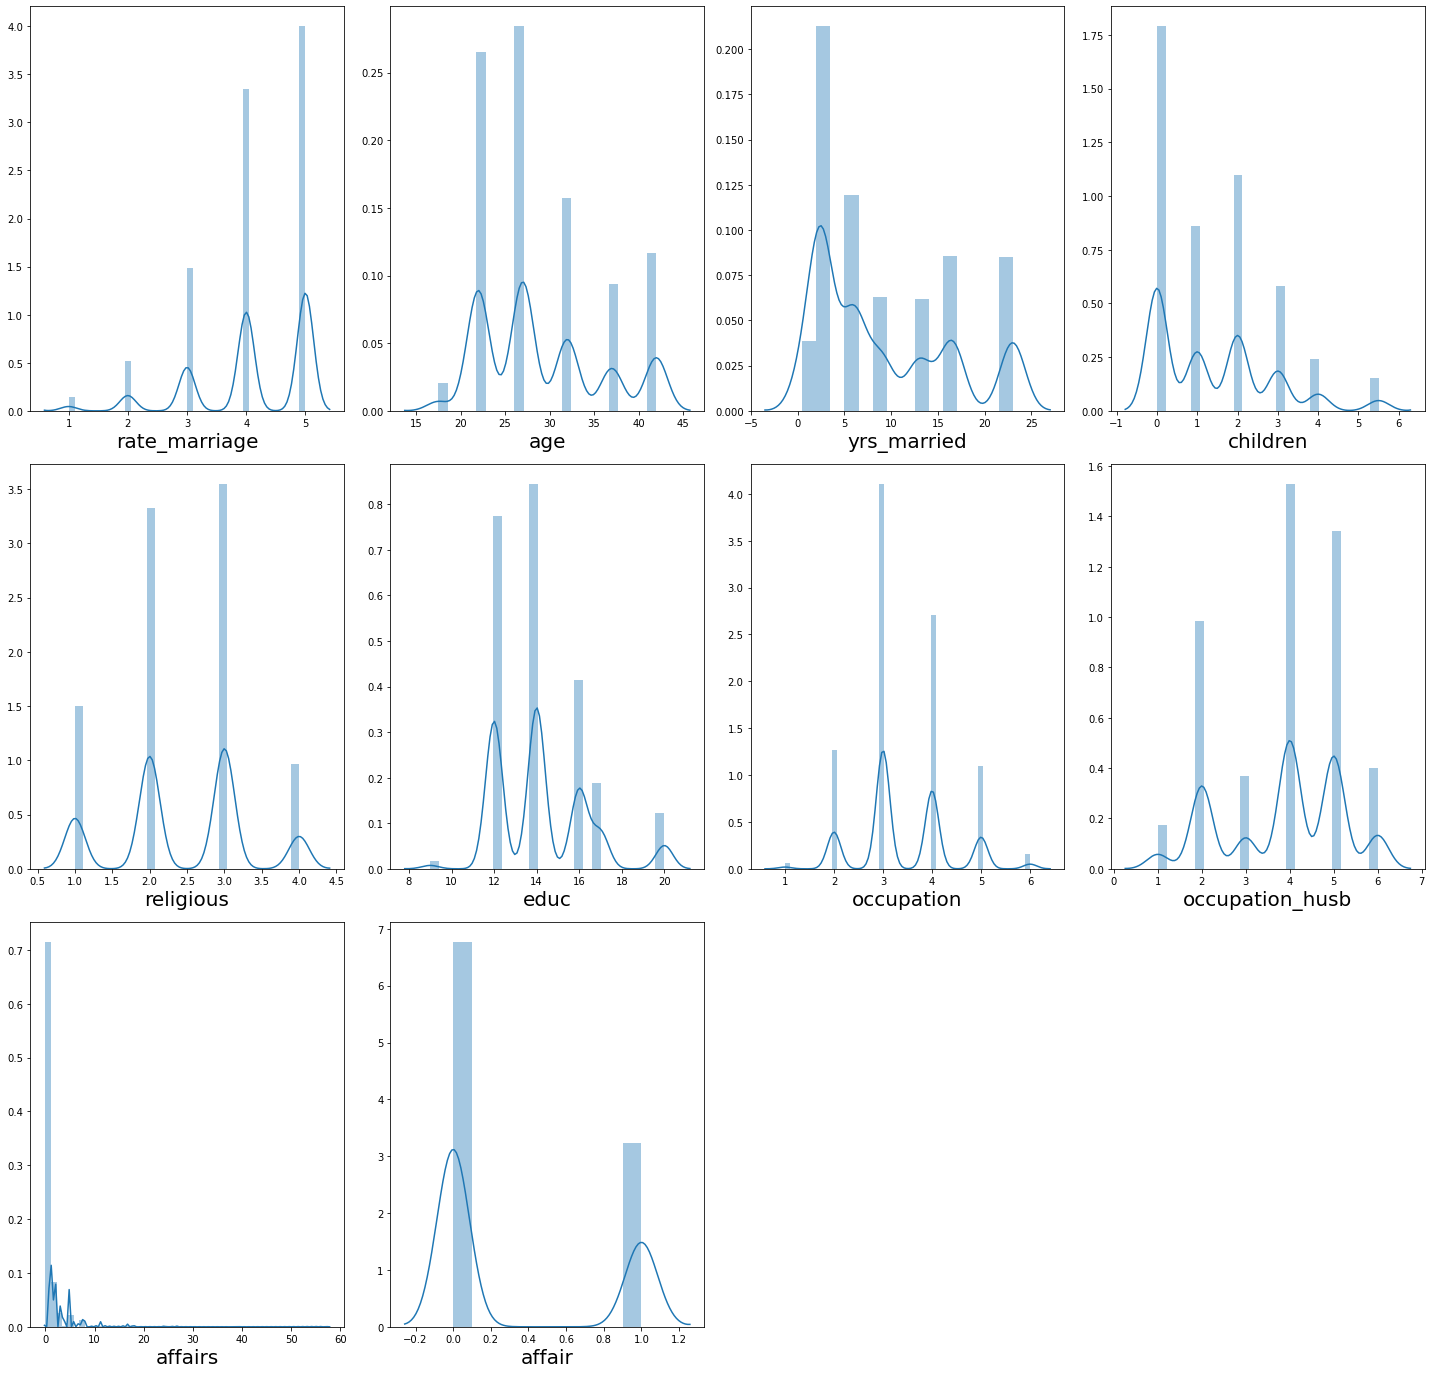

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta.columns:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Removing Outliers 

In [12]:
IQR = dta.rate_marriage.quantile(0.75)-dta.rate_marriage.quantile(0.25)
Lower_ratmarr = dta['rate_marriage'].quantile(0.25) - (IQR*1.5)
Higher_ratmarr =  dta['rate_marriage'].quantile(0.75) + (IQR*1.5)
dta_ratmar = dta[(dta['rate_marriage']>Lower_ratmarr) & (dta['rate_marriage']<Higher_ratmarr)]

In [13]:
IQR_ch = dta_ratmar.children.quantile(0.75)-dta_ratmar.children.quantile(0.25)
Lower_ch = dta_ratmar['children'].quantile(0.25) - (IQR_ch*1.5)
Higher_ch =  dta_ratmar['children'].quantile(0.75) + (IQR_ch*1.5)
dta_ch = dta_ratmar[(dta_ratmar['children']>Lower_ch) & (dta_ratmar['children']<Higher_ch)] 

In [14]:
IQR_edu = dta_ch.educ.quantile(0.75)-dta_ch.educ.quantile(0.25)
Lower_edu = dta_ch['educ'].quantile(0.25) - (IQR_edu*1.5)
Higher_edu =  dta_ch['educ'].quantile(0.75) + (IQR_edu*1.5)
dta_educ = dta_ch[(dta_ch['educ']>Lower_edu) & (dta_ch['educ']<Higher_edu)]

In [15]:
IQR_Occ = dta_educ.occupation.quantile(0.75)-dta_educ.occupation.quantile(0.25)
Lower_Occ = dta_educ['occupation'].quantile(0.25) - (IQR_Occ*1.5)
Higher_Occ =  dta_educ['occupation'].quantile(0.75) + (IQR_Occ*1.5)
dta_Occ = dta_educ[(dta_educ['occupation']>Lower_Occ) & (dta_educ['occupation']<Higher_Occ)]

In [16]:
data = dta_Occ

## Normalization 

In [35]:
from scipy.stats import boxcox

In [36]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [37]:
for col in data.columns:
    print(col)
    print('Feature Skewness   :', data[col].skew())
    print('Log Transformation :', np.log1p(data[col]).skew())
    print('Squre Root Transformation :',(data[col]**(1/2)).skew())
    if (col not in ['children','affair','affairs']):
        print('Boxcox Transformation :', pd.Series(boxcox(data[col])[0],).skew())
    else:
        print('Boxcox Transformation :', pd.Series(boxcox(data[col]+5)[0],).skew())
    print('Exponential :', np.exp(data[col]).skew())
    

rate_marriage
Feature Skewness   : -0.5015663702967754
Log Transformation : -0.6732227358201358
Squre Root Transformation : -0.607794093468708
Boxcox Transformation : -0.22478249321862315
Exponential : 0.03811218754823938
age
Feature Skewness   : 0.6700398258597853
Log Transformation : 0.31776997128867013
Squre Root Transformation : 0.49205893974760123
Boxcox Transformation : 0.03850549721148239
Exponential : 2.584077437932183
yrs_married
Feature Skewness   : 0.8315285397683833
Log Transformation : -0.07284329721609584
Squre Root Transformation : 0.33304767883000624
Boxcox Transformation : -0.06467776740723744
Exponential : 2.5873746086882887
children
Feature Skewness   : 0.5719393707765086
Log Transformation : 0.06266088474282885
Squre Root Transformation : -0.055502680124458574
Boxcox Transformation : 0.12786676638947103
Exponential : 2.736731754208601
religious
Feature Skewness   : -0.03466313787963795
Log Transformation : -0.523943819914329
Squre Root Transformation : -0.4007490720

In [38]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [39]:
data['rate_marriage'] =np.exp(data['rate_marriage'])

In [40]:
data['children']=data['children']**(1/2)

In [41]:
data['age']=boxcox(data['age'])[0]

In [42]:
data['yrs_married']=boxcox(data['yrs_married'])[0]

In [43]:
data['educ']=boxcox(data['educ'])[0]

In [44]:
data['occupation']=boxcox(data['occupation'])[0]

In [45]:
data['occupation_husb']=boxcox(data['occupation_husb'])[0]

## Model Creation 

In [46]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',data, return_type="dataframe")

In [47]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [48]:
y = np.ravel(y)

### Starndardization 

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [51]:
X_scaled

array([[ 0.        , -0.89917984, -0.65651875, ...,  1.22055311,
         0.66176345,  1.30253806],
       [ 0.        ,  1.11212458, -0.65651875, ...,  1.22055311,
        -1.62269701,  0.04005012],
       [ 0.        ,  1.11212458, -0.65651875, ..., -1.14552866,
        -1.62269701,  0.92897827],
       ...,
       [ 0.        ,  1.11212458, -0.65651875, ..., -1.14552866,
        -0.48046678,  0.04005012],
       [ 0.        ,  1.11212458, -0.65651875, ...,  0.22052929,
         0.66176345,  0.04005012],
       [ 0.        , -0.89917984, -0.65651875, ..., -1.14552866,
        -0.48046678,  0.92897827]])

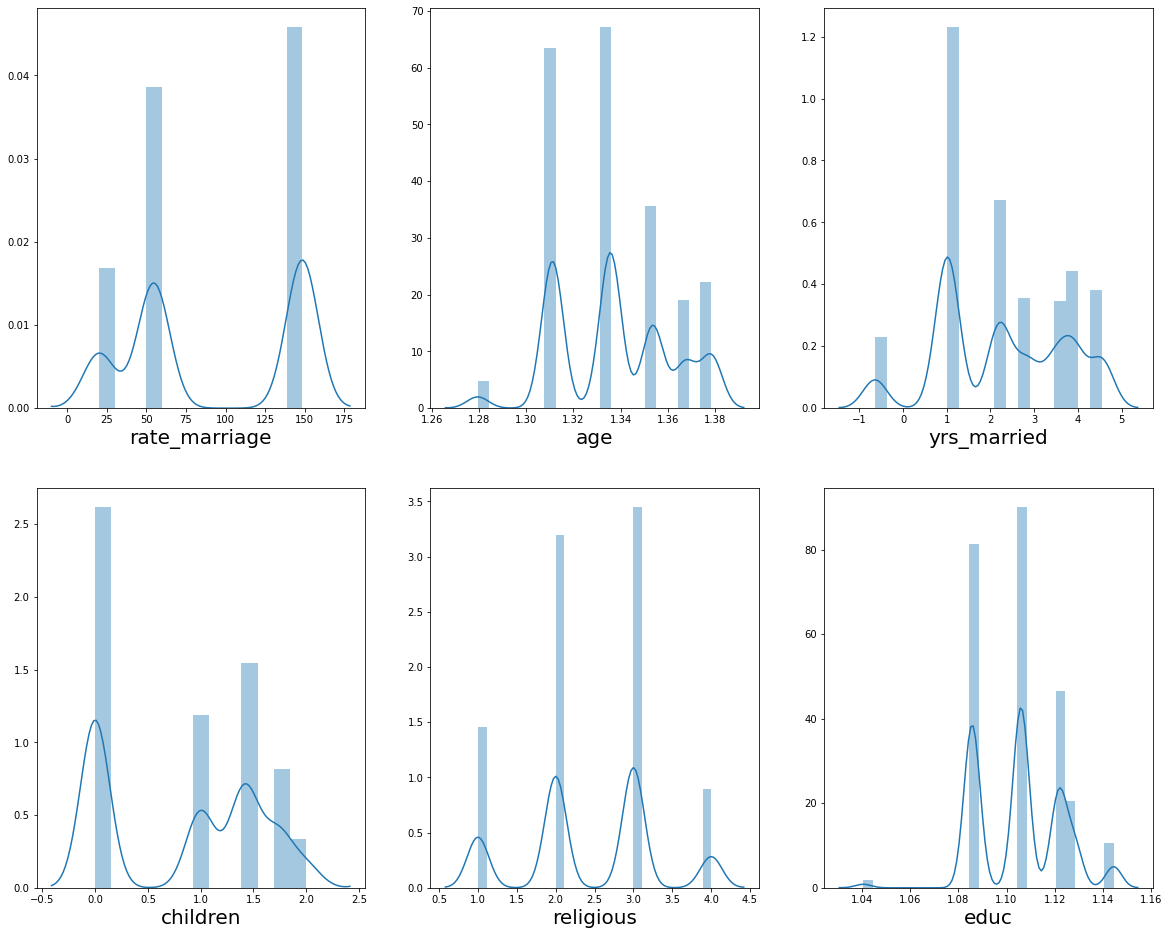

In [52]:
# let's see how data is distributed chaged every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.columns[:-4]:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()  

In [57]:
from sklearn.model_selection import GridSearchCV

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,pd.DataFrame(y),test_size = 0.25)
model = LogisticRegression()

In [67]:
params = [{'C':[1,10,100,150,200]},{'max_iter': [100, 150, 200, 250]},{'penalty':['l1','l2','elasticnet']}]

In [68]:
X_train

array([[ 0.        ,  1.11212458, -0.65651875, ...,  0.78636902,
        -1.62269701, -1.11022551],
       [ 0.        ,  1.11212458, -0.65651875, ...,  0.22052929,
         0.66176345, -1.11022551],
       [ 0.        ,  1.11212458, -0.65651875, ...,  0.78636902,
        -1.62269701,  0.04005012],
       ...,
       [ 0.        , -0.89917984, -0.65651875, ..., -1.14552866,
         0.66176345,  0.04005012],
       [ 0.        ,  1.11212458, -0.65651875, ...,  0.78636902,
        -0.48046678, -1.11022551],
       [ 0.        , -0.89917984,  1.52318575, ..., -1.14552866,
         0.66176345,  0.92897827]])

In [69]:
y_train.head()

,0
3545,0.0
5289,0.0
20,1.0
5530,0.0
1119,1.0


In [70]:
model = GridSearchCV(model,param_grid=params,scoring='f1',cv=10)

In [71]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 100, 150, 200]},
                         {'max_iter': [100, 150, 200, 250]},
                         {'penalty': ['l1', 'l2', 'elasticnet']}],
             scoring='f1')

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [74]:
accuracy =accuracy_score(y_test,model.predict(X_test))
accuracy

0.7201998572448252

In [75]:
confusion_matrix(y_test,model.predict(X_test))

array([[889,  91],
       [301, 120]], dtype=int64)

In [76]:
model.best_params_

{'C': 1}